# Characteristic Path Length - Example

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.DiGraph()
G.add_node(1, label = 'A')
G.add_node(2, label = 'B')
G.add_node(3, label = 'A')
G.add_node(4, label = 'B')
G.add_node(5, label = 'A')


G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (5,1), (5,2)])
G = G.to_undirected()

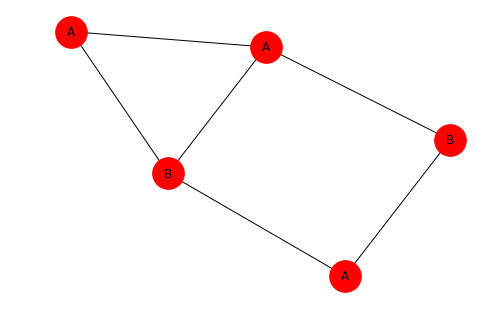

In [3]:
labels=dict((n,d['label']) for n,d in G.nodes(data=True))
nx.draw(G,labels=labels,node_size=1000,pos=nx.spring_layout(G))
plt.show()

In [4]:
def extract_label(G, lab):
    return [node[0] for node in G.nodes(data='label') if node[1] == lab ]

In [5]:
def cal_characteristic_path_length_sameLabel(G, label):
    list_label = extract_label(G, label)
    length = len(list_label)
    d_ij = 0
    n_ij = 0
    for i in list_label:
        for j in list_label:
            if i == j:
                continue
            else:
                n_ij = len([p for p in nx.all_shortest_paths(G, source=i, target=j)])
                d_ij = d_ij + (nx.shortest_path_length(G,i,j) * n_ij)
    return (1/(length*(length-1))*(d_ij/n_ij))

In [6]:
cal_characteristic_path_length_sameLabel(G, 'A')

2.333333333333333

In [7]:
def cal_characteristic_path_length_differentLabel(G, m, n):
    amount_dij = []
    list_label_m = extract_label(G, m)
    list_label_n = extract_label(G, n) 
    d_ij = 0
    n_ij = 0
    tmp_dij = 0
    for i in list_label_m:
        for j in list_label_n:
                n_ij = len([p for p in nx.all_shortest_paths(G, source=i, target=j)])
                d_ij = d_ij + (nx.shortest_path_length(G,i,j) * n_ij)
                tmp_dij = tmp_dij+ (d_ij/n_ij)
                d_ij = 0
                
    return (1/(len(list_label_m)*(len(list_label_n)))*tmp_dij)

In [8]:
cal_characteristic_path_length_differentLabel(G, 'A', 'B')

1.1666666666666665